In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


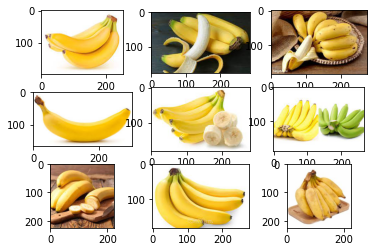

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Colab Notebooks/Train_AI/Fruit/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'Chuoi_'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [3]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/Colab Notebooks/Train_AI/Fruit/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Bo'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Buoi'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Cam'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Chuoi'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Coc'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Khe'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Man'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Mit'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Thanhlong'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Xoai'):
    output = 9
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('11Fruit.npy', photos)
save('11Fruit_labels.npy', labels)

(191, 200, 200, 3) (191,)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(11, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
 history = model.fit(photos, labels, epochs=100, verbose=1)

Epoch 1/100
6/6 [==============================] - 13s 153ms/step - loss: 1575.7771 - accuracy: 0.1152
Epoch 2/100
6/6 [==============================] - 0s 72ms/step - loss: 41.1873 - accuracy: 0.2618
Epoch 3/100
6/6 [==============================] - 0s 69ms/step - loss: 1.7042 - accuracy: 0.6073
Epoch 4/100
6/6 [==============================] - 0s 70ms/step - loss: 0.5582 - accuracy: 0.8325
Epoch 5/100
6/6 [==============================] - 0s 70ms/step - loss: 0.3255 - accuracy: 0.9634
Epoch 6/100
6/6 [==============================] - 0s 69ms/step - loss: 0.1307 - accuracy: 0.9791
Epoch 7/100
6/6 [==============================] - 0s 70ms/step - loss: 0.0447 - accuracy: 1.0000
Epoch 8/100
6/6 [==============================] - 0s 68ms/step - loss: 0.0162 - accuracy: 0.9948
Epoch 9/100
6/6 [==============================] - 0s 69ms/step - loss: 0.0139 - accuracy: 0.9948
Epoch 10/100
6/6 [==============================] - 0s 71ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 11/100


In [6]:
model.evaluate(photos,labels)

6/6 [==============================] - 0s 38ms/step - loss: 3.9569e-07 - accuracy: 1.0000


[3.956932346227404e-07, 1.0]

In [7]:
model.save('Food_Final.h5')

In [8]:
from keras.models import load_model
models=load_model('Food_Final.h5')

In [9]:
classes = ["Bo","Buoi","Cam","Chuoi","Coc","Khe","Man","Mit","Thanhlong","Xoai"]

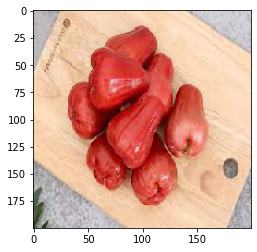

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('man.jpg', target_size=(200,200))
plt.imshow(img)

In [21]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.07158644 0.07232258 0.07710855 0.08671601 0.12008195 0.07814996
  0.13755584 0.11546929 0.10519835 0.05880535 0.07700562]]


'Man'